In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(pd.__version__)
print(sns.__version__)
print(np.__version__)

1.4.4
0.12.0
1.23.3


In [3]:
trdf=pd.read_csv('./dataframes/train.csv')
tedf=pd.read_csv('./dataframes/test.csv')
print(trdf.shape,tedf.shape)

(891, 12) (418, 11)


In [4]:
combine = [trdf,tedf]
for dataset in combine:
    print(dataset.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [5]:
for dataset in combine:
    print(dataset.sample(10))

     PassengerId  Survived  Pclass  \
770          771         0       3   
299          300         1       1   
8              9         1       3   
385          386         0       2   
614          615         0       3   
43            44         1       2   
550          551         1       1   
549          550         1       2   
483          484         1       3   
13            14         0       3   

                                                  Name     Sex   Age  SibSp  \
770                             Lievens, Mr. Rene Aime    male  24.0      0   
299    Baxter, Mrs. James (Helene DeLaudeniere Chaput)  female  50.0      0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
385                          Davies, Mr. Charles Henry    male  18.0      0   
614                    Brocklebank, Mr. William Alfred    male  35.0      0   
43            Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
550                        T

In [6]:
for dataset in combine:
    print(dataset.isna().sum(), '\n')


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 



## 결측치 

- 훈련데이터 Age, Cabin, Embarked 
- 예측데이터  Age, Fare, Cabin

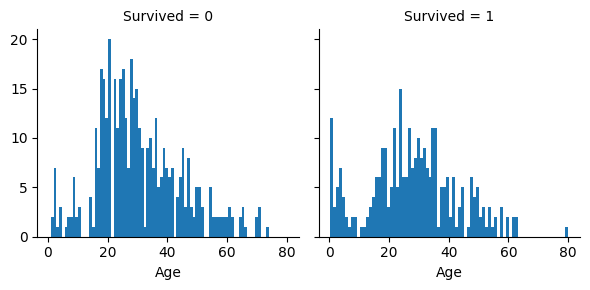

In [8]:
#나이에 따른 생존률 확인
sns.FacetGrid(trdf, col="Survived").map(plt.hist, 'Age',bins=80)


In [31]:

trdf.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    dataset['Deep'] = dataset.Cabin.str.extract('([A-Za-z])',expand=False)
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] +1

In [ ]:
trdf.info()

In [ ]:
trdf = trdf.drop(['PassengerId','Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [ ]:
tedf.info()

In [ ]:
tedf = tedf.drop(['Name','SibSp','Parch','Cabin','Ticket'],axis=1)

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt','Col','Don','Dr','Jonkheer','Major','Rev','Sir'],'Mr')
    dataset['Title'] = dataset['Title'].replace(['Countess','Lady','Dona'],'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Ms','Mlle','Mme'],'Miss')

In [ ]:
trdf['Embarked'] = trdf['Embarked'].fillna('S')
tedf['Fare'] = tedf['Fare'].fillna(8)

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({'Master':0,'Mr':1,'Mrs':2,'Miss':3}).astype(int)
    dataset['Sex'] = dataset['Sex'].map({'male':0,'female':1}).astype(int)
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'Q':1,'C':2}).astype(int)

## 여기까지 일반 셋팅

In [ ]:
for dataset in combine:
    print(dataset.isna().sum())


In [ ]:
g=sns.FacetGrid(trdf,row='Sex',col='Pclass')
g.map(plt.hist,'Age')

In [ ]:
trdf[(trdf['Pclass']==3) & (trdf['Sex']==0)].Age.mean()

In [ ]:
trdf[(trdf['Age'].isnull())&(trdf['Pclass']==2)]

In [ ]:
#Pclass, Gender 3*2 리스트
# 1-0or1
# [[0,0,0,],[0,0,0]]
guess_ages=np.zeros((2,3))
guess_ages

In [ ]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()
            age_guess=guess_df.mean()
            guess_ages[i,j]=age_guess
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex==i)&(dataset.Pclass==j+1),\
                "Age"]=guess_ages[i,j]
    dataset["Age"]=dataset["Age"].astype(int)

In [ ]:
trdf['AgeBand']=pd.cut(trdf['Age'],10)
trdf[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand')

In [ ]:
combine=[trdf,tedf]

In [ ]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=8,"Age"]=0
    dataset.loc[(dataset["Age"]>8)&(dataset["Age"]<=16),"Age"]=1
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<=24),"Age"]=2
    dataset.loc[(dataset["Age"]>24)&(dataset["Age"]<=32),"Age"]=3
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<=40),"Age"]=4
    dataset.loc[(dataset["Age"]>40)&(dataset["Age"]<=48),"Age"]=5
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<=56),"Age"]=6
    dataset.loc[(dataset["Age"]>56)&(dataset["Age"]<=64),"Age"]=7
    dataset.loc[(dataset["Age"]>64)&(dataset["Age"]<=72),"Age"]=8
    dataset.loc[(dataset["Age"]>72)&(dataset["Age"]<=80),"Age"]=9
    dataset.loc[(dataset["Age"]>80),"Age"]=10
    
trdf.head()

In [ ]:
trdf=trdf.drop(['AgeBand'],axis=1)

In [ ]:
trdf.head()

In [ ]:
tedf.head()

In [ ]:
trdf['FareBand']=pd.qcut(trdf['Fare'],4)
trdf[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand')


In [ ]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<=7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"]>7.91) & (dataset["Fare"]<=14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"]>14.454) & (dataset["Fare"]<=31.0),"Fare"]=2
    dataset.loc[(dataset["Fare"]>31.0) & (dataset["Fare"]<=512.329),"Fare"]=3


In [ ]:
trdf.head()

In [ ]:
trdf=trdf.drop(["FareBand"],axis=1)
combine=[trdf,tedf]

In [ ]:
tedf.head()

In [ ]:
X_trdf=trdf.drop('Survived',axis=1)
Y_trdf=trdf['Survived']
X_tedf=tedf.drop('PassengerId', axis=1).copy()
X_trdf.shape, Y_trdf.shape, X_tedf.shape

## 로지스틱 레그레이션
## 렐루, 시그모이드

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
logreg.fit(X_trdf,Y_trdf)
Y_pred=logreg.predict(X_tedf)
acc_log=round(logreg.score(X_trdf,Y_trdf)*100,2)
acc_log

### 서포트 벡터 머신

- 분류 알고리즘
- 이진데이터 분류시 최적 성능

In [ ]:
from sklearn.svm import SVC, LinearSVC
svc=SVC()
svc.fit(X_trdf,Y_trdf)
Y_pred=svc.predict(X_tedf)
acc_svc=round(svc.score(X_trdf,Y_trdf)*100,2)
acc_svc

### k-NN 분류와 회귀

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_trdf,Y_trdf)
Y_pred=knn.predict(X_tedf)
acc_knn=round(knn.score(X_trdf,Y_trdf)*100,2)
acc_knn

## 나이브 베이지안

In [ ]:
from sklearn.naive_bayes import GaussianNB 
gaussian=GaussianNB()
gaussian.fit(X_trdf,Y_trdf)
Y_pred=gaussian.predict(X_tedf)
acc_gaussian=round(gaussian.score(X_trdf,Y_trdf)*100,2)
acc_gaussian

## 퍼셉트론

In [ ]:
from sklearn.linear_model import Perceptron
perceptron=Perceptron()
perceptron.fit(X_trdf,Y_trdf)
Y_pred=perceptron.predict(X_tedf)
acc_perceptron=round(perceptron.score(X_trdf,Y_trdf)*100,2)
acc_perceptron

## LinearSVC

In [ ]:
linear_svc=LinearSVC()
linear_svc.fit(X_trdf,Y_trdf)
Y_pred=linear_svc.predict(X_tedf)
acc_linear_svc=round(linear_svc.score(X_trdf,Y_trdf)*100,2)
acc_linear_svc

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_trdf,Y_trdf)
Y_pred=sgd.predict(X_tedf)
acc_sgd=round(sgd.score(X_trdf,Y_trdf)*100,2)
acc_sgd

## 결정트리(Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_trdf,Y_trdf)
Y_pred=decision_tree.predict(X_tedf)
acc_decision_tree=round(decision_tree.score(X_trdf,Y_trdf)*100,2)
acc_decision_tree

## 랜덤 포레스트(Random Forest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_trdf,Y_trdf)
Y_pred=random_forest.predict(X_tedf)
acc_random_forest=round(random_forest.score(X_trdf,Y_trdf)*100,2)
acc_random_forest

## 모델 평가 순위

In [ ]:
models=pd.DataFrame({
    'Model':['SVM',
             'KNN',
             'Logistic Regression',
             'Random Forest',
             'Naive Bayes',
             'Perceptron',
             'SGD',
             'L-SVC',
             'Decision Tree'],
    'Score':[
        acc_svc,
        acc_knn,
        acc_log,
        acc_random_forest,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_linear_svc,
        acc_decision_tree
    ]
})
models.sort_values(by='Score', ascending=False)

In [ ]:
submission=pd.DataFrame({
    'PassengerId':tedf['PassengerId'],
    'Survived':Y_pred
})

In [ ]:
submission.head()

In [ ]:
submission.to_csv('submission.csv',index=False)